<a href="https://colab.research.google.com/github/jlakshmi/trip-travel-dataset/blob/main/travel_plan_q2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

def generate_random_solution(num_cities):
    # Generate a random initial solution
    return random.sample(range(num_cities), num_cities)

def two_opt_swap(solution, i, j):
    # Perform a 2-opt swap on the solution
    new_solution = solution.copy()
    new_solution[i:j+1] = reversed(solution[i:j+1])
    return new_solution

def total_distance(solution, distances):
    # Calculate the total distance of the solution
    dist = sum(distances[solution[i]][solution[i+1]] for i in range(len(solution) - 1))
    dist += distances[solution[-1]][solution[0]]  # Return to the starting city
    return dist

def local_search(solution, distances):
    # Perform a simple local search (2-opt swap)
    improved = True
    while improved:
        improved = False
        for i in range(1, len(solution) - 2):
            for j in range(i + 1, len(solution)):
                if j - i == 1: continue  # No point in reversing a segment of length 1
                new_solution = two_opt_swap(solution, i, j)
                new_distance = total_distance(new_solution, distances)
                if new_distance < total_distance(solution, distances):
                    solution = new_solution
                    improved = True
                    break
            if improved:
                break
    return solution

def MRSILS(num_restarts, max_iterations, num_cities, distances):
    best_solution = None
    best_distance = float('inf')

    for _ in range(num_restarts):
        # Generate a random initial solution
        solution = generate_random_solution(num_cities)

        # Perform local search
        for _ in range(max_iterations):
            new_solution = local_search(solution, distances)
            new_distance = total_distance(new_solution, distances)
            if new_distance < best_distance:
                best_solution = new_solution
                best_distance = new_distance
            solution = new_solution

    return best_solution, best_distance

# Example usage
num_cities = 11
distances = [
        [0, 248, 134, 166, 190, 290, 477, 624, 351, 546, 461],
        [248, 0, 316, 318, 373, 400, 426, 504, 283, 426, 341],
        [134, 316, 0, 118, 78, 177, 364, 562, 313, 482, 487],
        [166, 318, 118, 0, 94, 161, 349, 430, 203, 349, 427],
        [190, 373, 78, 94, 0, 104, 291, 489, 240, 408, 501],
        [290, 400, 177, 161, 104, 0, 189, 387, 174, 306, 403],
        [477, 426, 364, 349, 291, 189, 0, 199, 148, 118, 254],
        [624, 504, 562, 430, 489, 387, 199, 0, 253, 77, 223],
        [351, 283, 313, 203, 240, 174, 148, 253, 0, 173, 242],
        [546, 426,482, 349, 408, 306, 118, 77, 173, 0 , 143],
        [461, 341, 487, 427, 501, 403, 254, 223, 242, 143,0]
    ]
 # Example distance matrix

num_restarts = 10
max_iterations = 100
best_solution, best_distance = MRSILS(num_restarts, max_iterations, num_cities, distances)

print("Best Solution:", best_solution)
print("Best Distance:", best_distance)


Best Solution: [10, 7, 9, 6, 8, 5, 4, 3, 2, 0, 1]
Best Distance: 1779


In [ ]:
import numpy as np

# Define the states
states = ["Dandeli","Hampi", "Gokarna", "Jog Falls", "Murdeshwar","Udupi","Coorg","Bandipur","Chikkamagalur","Mysore","Bangalore"]

# Define the transition matrix
transition_matrix = np.array([
    [0.00, 0.07, 0.04, 0.05, 0.05, 0.08, 0.14, 0.18, 0.10, 0.16, 0.13],
    [0.07, 0.05, 0.09, 0.09, 0.10, 0.11, 0.12, 0.14, 0.08, 0.12, 0.03],
    [0.04, 0.09, 0.02, 0.04, 0.03, 0.06, 0.12, 0.15, 0.10, 0.16, 0.19],
    [0.05,0.09,0.04,0.06,0.04,0.06,0.13,0.16,0.08,0.13,0.16],
    [0.05,0.10,0.01,0.04,0.05,0.04,0.11,0.08,0.09,0.15,0.28],
    [0.08,0.11,0.06,0.06,0.04,0.09,0.07,0.05,0.07,0.11,0.26],
    [0.14,0.12,0.12,0.13,0.11,0.07,0.06,0.07,0.05,0.04,0.09],
    [0.18,0.14,0.19,0.16,0.18,0.15,0.07,0.02,0.10,0.10,-0.29],
    [0.10,0.08,0.11,0.09,0.07,0.06,0.05,0.07,0.19,0.13,0.05],
    [0.16,0.06,0.16,0.12,0.15,0.12,0.04,0.02,0.07,0.00,0.10],
    [0.13,0.09,0.16,0.16,0.18,0.16,0.09,0.06,0.07,-0.10,0.00]
])

# Function to simulate a trip
def simulate_trip(start_state, steps=5):
    current_state = start_state
    trip = [current_state]
    for _ in range(steps):
        current_state = np.random.choice(states, p=transition_matrix[states.index(current_state)])
        trip.append(current_state)
    return trip

# Example usage
start_state = "Gokarna"
trip = simulate_trip(start_state, steps=5)
print("Trip:", trip)


Trip: ['Gokarna', 'Hampi', 'Murdeshwar', 'Hampi', 'Udupi', 'Mysore']


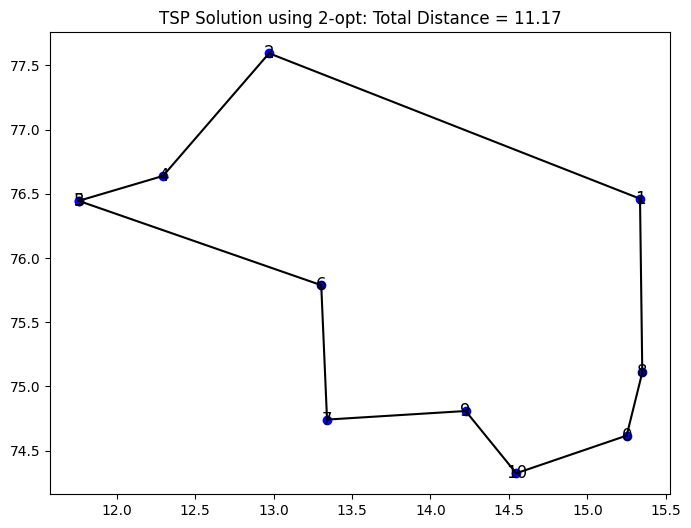

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def calculate_distance(points, tour):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += np.linalg.norm(np.array(points[tour[i]]) - np.array(points[tour[i+1]]))
    total_distance += np.linalg.norm(np.array(points[tour[-1]]) - np.array(points[tour[0]]))
    return total_distance

def two_opt_swap(tour, i, j):
    new_tour = tour[:i] + tour[i:j+1][::-1] + tour[j+1:]
    return new_tour

def two_opt(points, max_iter=1000):
    num_cities = len(points)
    tour = list(range(num_cities))
    best_tour = tour
    best_distance = calculate_distance(points, best_tour)
    improvement = True
    iteration = 0

    while improvement and iteration < max_iter:
        improvement = False
        for i in range(1, num_cities - 1):
            for j in range(i+1, num_cities):
                new_tour = two_opt_swap(tour, i, j)
                new_distance = calculate_distance(points, new_tour)
                if new_distance < best_distance:
                    best_tour = new_tour
                    best_distance = new_distance
                    improvement = True
        tour = best_tour
        iteration += 1

    return best_tour, best_distance

# Generate random points (cities)
num_cities = 11
points = points = np.array([[15.249678, 74.617371], [15.334880, 76.462044], [12.971599, 77.594566], [11.758409, 76.445381], [12.295810, 76.639381], [11.758409, 76.445381], [13.303880, 75.78878], [13.340881, 74.742142], [15.349390, 75.109520], [14.223900, 74.808891], [14.546300, 74.324020]])

# Solve TSP using 2-opt
best_tour, best_distance = two_opt(points)

# Plot the tour
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], c='blue', marker='o')
for i in range(num_cities):
    plt.text(points[i, 0], points[i, 1], str(i), fontsize=12, ha='center', va='center')
for i in range(num_cities - 1):
    plt.plot([points[best_tour[i], 0], points[best_tour[i+1], 0]], [points[best_tour[i], 1], points[best_tour[i+1], 1]], 'k-')
plt.plot([points[best_tour[-1], 0], points[best_tour[0], 0]], [points[best_tour[-1], 1], points[best_tour[0], 1]], 'k-')
plt.title(f'TSP Solution using 2-opt: Total Distance = {best_distance:.2f}')
plt.show()


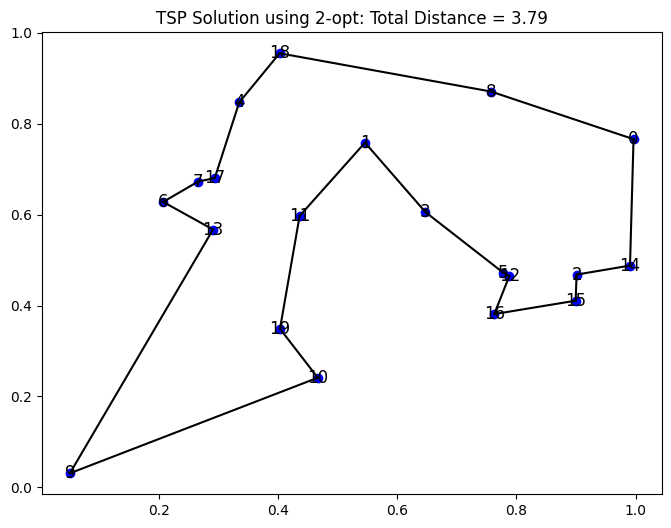

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def calculate_distance(points, tour):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += np.linalg.norm(points[tour[i]] - points[tour[i+1]])
    total_distance += np.linalg.norm(points[tour[-1]] - points[tour[0]])
    return total_distance

def two_opt_swap(tour, i, j):
    new_tour = tour[:i] + tour[i:j+1][::-1] + tour[j+1:]
    return new_tour

def two_opt(points, max_iter=1000):
    num_cities = len(points)
    tour = list(range(num_cities))
    best_tour = tour
    best_distance = calculate_distance(points, best_tour)
    improvement = True
    iteration = 0

    while improvement and iteration < max_iter:
        improvement = False
        for i in range(1, num_cities - 1):
            for j in range(i+1, num_cities):
                new_tour = two_opt_swap(tour, i, j)
                new_distance = calculate_distance(points, new_tour)
                if new_distance < best_distance:
                    best_tour = new_tour
                    best_distance = new_distance
                    improvement = True
        tour = best_tour
        iteration += 1

    return best_tour, best_distance

# Generate random points (cities)
num_cities = 20
random.seed(42)
points = np.random.rand(num_cities, 2)

# Solve TSP using 2-opt
best_tour, best_distance = two_opt(points)

# Plot the tour
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], c='blue', marker='o')
for i in range(num_cities):
    plt.text(points[i, 0], points[i, 1], str(i), fontsize=12, ha='center', va='center')
for i in range(num_cities - 1):
    plt.plot([points[best_tour[i], 0], points[best_tour[i+1], 0]], [points[best_tour[i], 1], points[best_tour[i+1], 1]], 'k-')
plt.plot([points[best_tour[-1], 0], points[best_tour[0], 0]], [points[best_tour[-1], 1], points[best_tour[0], 1]], 'k-')
plt.title(f'TSP Solution using 2-opt: Total Distance = {best_distance:.2f}')
plt.show()


In [ ]:
from math import radians, cos, sin, asin, sqrt
import heapq

EARTH_RADIUS = 6371.0  # Earth's radius in kilometers

def haversine(lon1, lat1, lon2, lat2):
    """Calculate the great-circle distance between two points
    on the Earth's surface using the Haversine formula."""
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    return c * EARTH_RADIUS

class Node:
    def __init__(self, state, parent=None, g=0, h=0):
        self.state = state
        self.parent = parent
        self.g = g  # cost from start node to current node
        self.h = h  # heuristic cost from current node to goal node

    def f(self):
        return self.g + self.h

def astar(start, goal, graph, heuristic):
    open_set = []
    closed_set = set()

    start_node = Node(start, None, 0, heuristic(*start, *goal))
    heapq.heappush(open_set, (start_node.f(), id(start_node), start_node))

    while open_set:
        _, _, current_node = heapq.heappop(open_set)

        if current_node.state == goal:
            path = []
            while current_node:
                path.append(current_node.state)
                current_node = current_node.parent
            return path[::-1]

        closed_set.add(current_node.state)

        for neighbor in graph[current_node.state]:
            if neighbor in closed_set:
                continue

            g = current_node.g + graph[current_node.state][neighbor]
            h = heuristic(*neighbor, *goal)
            new_node = Node(neighbor, current_node, g, h)
            heapq.heappush(open_set, (new_node.f(), id(new_node), new_node))

    return None

# Example graph representation with latitude and longitude coordinates
graph = {
    (12.9716, 77.5946): {(12.9716, 77.5956): 10, (12.9726, 77.5946): 15},
    (12.9716, 77.5956): {(12.9716, 77.5946): 10, (12.9726, 77.5956): 10},
    (12.9726, 77.5946): {(12.9716, 77.5946): 15, (12.9726, 77.5956): 5},
    (12.9726, 77.5956): {(12.9716, 77.5956): 10, (12.9726, 77.5946): 5}
}

start = (12.9716, 77.5946)
goal = (12.9726, 77.5956)

path = astar(start, goal, graph, haversine)
if path:
    print("Path found:", path)
    total_distance = sum(haversine(path[i][1], path[i][0], path[i + 1][1], path[i + 1][0]) for i in range(len(path) - 1))
    print("Total distance:", total_distance)
else:
    print("Path not found")


Path found: [(12.9716, 77.5946), (12.9716, 77.5956), (12.9726, 77.5956)]
Total distance: 0.21955231969990985


In [ ]:
from math import radians, cos, sin, asin, sqrt
import heapq

EARTH_RADIUS = 6371.0  # Earth's radius in kilometers

def haversine(lon1, lat1, lon2, lat2):
    """Calculate the great-circle distance between two points
    on the Earth's surface using the Haversine formula."""
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    return c * EARTH_RADIUS

class Node:
    def __init__(self, state, parent=None, g=0, h=0):
        self.state = state
        self.parent = parent
        self.g = g  # cost from start node to current node
        self.h = h  # heuristic cost from current node to goal node

    def f(self):
        return self.g + self.h

def astar(start, goal, graph, heuristic):
    open_set = []
    closed_set = set()

    start_node = Node(start, None, 0, heuristic(*start, *goal))
    heapq.heappush(open_set, (start_node.f(), id(start_node), start_node))

    while open_set:
        _, _, current_node = heapq.heappop(open_set)

        if current_node.state == goal:
            path = []
            while current_node:
                path.append(current_node.state)
                current_node = current_node.parent
            return path[::-1]

        closed_set.add(current_node.state)

        for neighbor in graph[current_node.state]:
            if neighbor in closed_set:
                continue

            g = current_node.g + graph[current_node.state][neighbor]
            h = heuristic(*neighbor, *goal)
            new_node = Node(neighbor, current_node, g, h)
            heapq.heappush(open_set, (new_node.f(), id(new_node), new_node))

    return None

# Example graph representation with latitude and longitude coordinates
graph = {
    (15.249678,74.617371): {(15.249678,74.617371): 10, (14.223900,74.808891): 1},
    (14.223900,74.808891): {(15.249678,74.617371): 10, (14.223900,74.808891): 1},
    (15.249678,74.617371): {(15.249678,74.617371): 1, (14.223900,74.808891): 10},
    (14.223900,74.808891): {(14.223900,74.808891): 10, (15.249678,74.617371): 1}
}

start = (15.249678,74.617371)
goal = (14.223900,74.808891)

path = astar(start, goal, graph, haversine)
if path:
    print("Path found:", path)
    total_distance = sum(haversine(path[i][1], path[i][0], path[i + 1][1], path[i + 1][0]) for i in range(len(path) - 1))
    print("Total distance:", total_distance)
else:
    print("Path not found")


Path found: [(15.249678, 74.617371), (14.2239, 74.808891)]
Total distance: 115.90575337459934


In [ ]:
from math import radians, cos, sin, asin, sqrt
import heapq

EARTH_RADIUS = 6371.0  # Earth's radius in kilometers

def haversine(lon1, lat1, lon2, lat2):
    """Calculate the great-circle distance between two points
    on the Earth's surface using the Haversine formula."""
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    return c * EARTH_RADIUS

class Node:
    def __init__(self, state, parent=None, g=0, h=0):
        self.state = state
        self.parent = parent
        self.g = g  # cost from start node to current node
        self.h = h  # heuristic cost from current node to goal node

    def f(self):
        return self.g + self.h

def astar(start, goal, graph, heuristic):
    open_set = []
    closed_set = set()

    start_node = Node(start, None, 0, heuristic(*start, *goal))
    heapq.heappush(open_set, (start_node.f(), id(start_node), start_node))

    while open_set:
        _, _, current_node = heapq.heappop(open_set)

        if current_node.state == goal:
            path = []
            while current_node:
                path.append(current_node.state)
                current_node = current_node.parent
            return path[::-1]

        closed_set.add(current_node.state)

        for neighbor in graph[current_node.state]:
            if neighbor in closed_set:
                continue

            g = current_node.g + graph[current_node.state][neighbor]
            h = heuristic(*neighbor, *goal)
            new_node = Node(neighbor, current_node, g, h)
            heapq.heappush(open_set, (new_node.f(), id(new_node), new_node))

    return None

# Example graph representation with latitude and longitude coordinates
graph = {
    (12.9716, 77.5946): {(14.543600,74.324020): 15, (12.9716, 77.5946): 32},
    (14.543600,74.324020): {(12.9716, 77.5946): 15, (14.543600,74.324020): 32},
    (12.9726, 77.5946): {(12.9716, 77.5946): 32,(14.543600,74.324020): 15},
    (14.543600,74.324020): {(14.543600,74.324020): 32, (12.9726, 77.5946): 15}
}

start = (12.9716, 77.5946)
goal =  (14.543600,74.324020)

path = astar(start, goal, graph, haversine)
if path:
    print("Path found:", path)
    total_distance = sum(haversine(path[i][1], path[i][0], path[i + 1][1], path[i + 1][0]) for i in range(len(path) - 1))
    print("Total distance:", total_distance)
else:
    print("Path not found")


Path found: [(12.9716, 77.5946), (14.5436, 74.32402)]
Total distance: 394.1074330854906


In [ ]:
from math import radians, cos, sin, asin, sqrt
import heapq

EARTH_RADIUS = 6371.0  # Earth's radius in kilometers

def haversine(lon1, lat1, lon2, lat2):
    """Calculate the great-circle distance between two points
    on the Earth's surface using the Haversine formula."""
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    return c * EARTH_RADIUS

class Node:
    def __init__(self, state, parent=None, g=0, h=0):
        self.state = state
        self.parent = parent
        self.g = g  # cost from start node to current node
        self.h = h  # heuristic cost from current node to goal node

    def f(self):
        return self.g + self.h

def astar(start, goal, graph, heuristic):
    open_set = []
    closed_set = set()

    start_node = Node(start, None, 0, heuristic(*start, *goal))
    heapq.heappush(open_set, (start_node.f(), id(start_node), start_node))

    while open_set:
        _, _, current_node = heapq.heappop(open_set)

        if current_node.state == goal:
            path = []
            while current_node:
                path.append(current_node.state)
                current_node = current_node.parent
            return path[::-1]

        closed_set.add(current_node.state)

        for neighbor in graph[current_node.state]:
            if neighbor in closed_set:
                continue

            g = current_node.g + graph[current_node.state][neighbor]
            h = heuristic(*neighbor, *goal)
            new_node = Node(neighbor, current_node, g, h)
            heapq.heappush(open_set, (new_node.f(), id(new_node), new_node))

    return None

# Example graph representation with latitude and longitude coordinates
graph = {
    (12.9716, 77.5946): {(14.543600,74.324020): 15, (12.9716, 77.5946): 32},
    (14.543600,74.324020): {(12.9716, 77.5946): 15, (14.543600,74.324020): 32},
    (12.9726, 77.5946): {(12.9716, 77.5946): 32,(14.543600,74.324020): 15},
    (14.543600,74.324020): {(14.543600,74.324020): 32, (12.9726, 77.5946): 15}
}

start = (12.9716, 77.5946)
goal = (12.9726, 77.5956)

path = astar(start, goal, graph, haversine)
if path:
    print("Path found:", path)
    total_distance = sum(haversine(path[i][1], path[i][0], path[i + 1][1], path[i + 1][0]) for i in range(len(path) - 1))
    print("Total distance:", total_distance)
else:
    print("Path not found")


Path not found


Dijkstra

In [ ]:
import heapq

def dijkstra(graph, start, end):
    # Initialize distances to all nodes as infinite
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0

    # Priority queue to store nodes to visit
    pq = [(0, start)]

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if we have already found a better path to current_node
        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            # If new path is shorter, update distance and push to queue
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    # Return the shortest distance to the end node
    return distances[end]

# Example usage
graph = {
    'Dandeli': {'Hampi': 248, 'Gokarna': 134, 'Jog Falls':166, 'Murdeshwar':190,'Udupi':290},
    'Hampi': {'Gokarna': 316, 'Jog Falls': 318, 'Murdeshwar': 373,'Udupi':400},
    'Gokarna': {'Jog Falls': 118, 'Murdeshwar': 78, 'Udupi': 177},
    'Jog Falls': {'Hampi': 318, 'Gokarna': 118,'Murdeshwar': 94, 'Udupi': 161},
    'Murdeshwar':{'Gokarna': 78, 'Jog Falls':94,'Udupi':104},
    'Udupi':{'Hampi': 400, 'Gokarna': 177, 'Jog Falls':161, 'Murdeshwar':104}


}

start = 'Dandeli'
end = 'Udupi'
shortest_distance = dijkstra(graph, start, end)
print(f"The shortest distance from {start} to {end} is {shortest_distance}")


The shortest distance from Dandeli to Udupi is 290


Bell man Ford

In [ ]:
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight

def bellman_ford(edges, V, start):
    # Step 1: Initialize distances from start to all other vertices as INFINITE
    distances = [float("Inf")] * V
    distances[start] = 0

    # Step 2: Relax all edges |V| - 1 times.
    for _ in range(V - 1):
        for edge in edges:
            if distances[edge.u] + edge.weight < distances[edge.v]:
                distances[edge.v] = distances[edge.u] + edge.weight

    # Step 3: Check for negative-weight cycles.
    # The above step guarantees shortest distances if graph doesn't contain negative weight cycle.
    # If we get a shorter path, then there is a cycle.
    for edge in edges:
        if distances[edge.u] + edge.weight < distances[edge.v]:
            print("Graph contains negative weight cycle")
            return None

    return distances

# Example usage
edges = [
    Edge(0, 1, 248),
    Edge(0, 2, 134),
    Edge(0,3,166),
    Edge(0,4,190),
    Edge(0,5,290),
    Edge(1, 2, 316),
    Edge(1, 3, 318),
     Edge(1, 4, 373),
    Edge(1, 5, 400),
    Edge(2, 3, 118),
    Edge(2, 4, 78),
      Edge(2, 5, 177),
    Edge(3, 4, 94),
    Edge(3, 5, 161),
    Edge(4, 5, 104)
]

V = 6  # Number of vertices in graph
start = 0  # Starting node

distances = bellman_ford(edges, V, start)
if distances:
    print("Vertex Distance from Source")
    for i in range(V):
        print(f"{i}\t\t{distances[i]}")


Vertex Distance from Source
0		0
1		248
2		134
3		166
4		190
5		290
